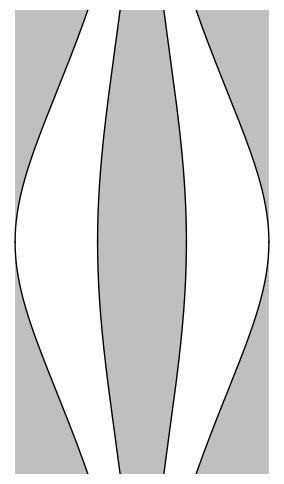

In [4]:
z(Rm,R,r)=(r*r/2-R*R/2+Rm*Rm*ln(R/r))**.5

def plot_equipot(Rm,R,**kwds):
    r = var('r')
    return sum([
            plot(f, (r,m,M)
                 ,color='black'
                 #,adaptive_recursion=16
                 #,adaptive_tolerance=1e-5
                 ,fill=(lambda f:f*s if f else f)(ks.pop('fill',None))
                 ,**ks
                )
            for (f,m,M,s,ks) in [
                    (s*z(Rm,R,x),m,M,s,kwds.copy())
                    for s in [-1,1]
                    for (m,M,x) in [(0,R,r),(-R,0,-r)]
                ]
        ])

Rm=32
L=Rm*.8
a=[7,20]

i=sum([
        plot_equipot(Rm,R
                     ,fill=2*L if j else 0
                    )
        for (j,R) in enumerate(a)
    ])

kwds = {'axes':False, 'ymin':-L, 'ymax':L,'figsize':(3,5)}
i.show(**kwds)

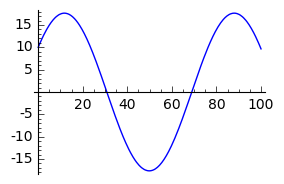

In [5]:
m = 500.2533
q = 2
k = 1.7
z0 = 10
z_0 = 1.2

Ez = (m/2 * z_0 * z_0)/q
w = (k*q/m)**.5

t = var('t')

zz = z0 * cos(w*t) + sin(w*t) * (2*Ez/k)**.5

plot(zz, (t,0,100), figsize=(3,2))

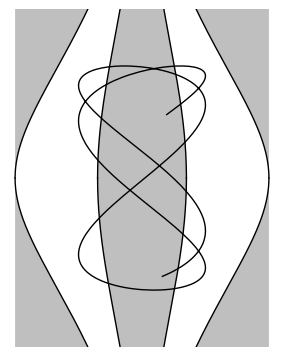

In [6]:
# circular motion

R = 10
wphi = w * (((Rm/R)**2 - 1)/2)**.5
phi0 = .4

r0 = R

rr = r0
phi = wphi*t + phi0

# now plot on the projection we're using

yy = rr * sin(phi)

j = i + parametric_plot((yy, zz), (t,0,120), color='black')


j.save('orbi.svg',**kwds)
j.show(**kwds)